_Lambda School Data Science, Unit 2_
 
# Classification 1 Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll use information about the shot and the game to predict whether the shot was made. This is hard to predict! Try for an accuracy score in the high 50's or low 60's. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [45]:
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url, parse_dates=['game_date']).set_index('game_date')
assert df.shape == (13958, 19)

This Sprint Challenge has two parts. To demonstrate mastery on each part, do all the required, numbered instructions. To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Prepare to model

### Required

1. **Do train/validate/test split.** Use the 2009-10 season through 2016-17 season to train, the 2017-18 season to validate, and the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your train set has 11081 observations, your validation set has 1168 observations, and your test set has 1709 observations.
2. **Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is the baseline accuracy for the validation set, if you guessed the majority class for every prediction?
3. **Use Ordinal Encoding _or_ One-Hot Encoding,** for the categorical features you select.
4. **Train a Random Forest _or_ Logistic Regression** with the features you select.

### Stretch goals
Engineer at least 4 of these 5 features:

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?
    

## Part 2. Evaluate models

### Required
1. Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.)
2. Get your model's **test accuracy.** (One time, at the end.)
3. Get and plot your Random Forest's **feature importances** _or_ your Logistic Regression's **coefficients.**
4. Imagine this is the confusion matrix for a binary classification model. **Calculate accuracy, precision, and recall for this confusion matrix:**

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>


### Stretch goals
- Calculate F1 score for the provided, imaginary confusion matrix.
- Plot a real confusion matrix for your basketball model, with row and column labels.
- Print the classification report for your model.

### Imports

In [94]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

### Explore Data

In [47]:
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot
game_date,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0
2009-10-28,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0
2009-10-28,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0


In [48]:
cols = df.columns.tolist()
cols

['game_id',
 'game_event_id',
 'player_name',
 'period',
 'minutes_remaining',
 'seconds_remaining',
 'action_type',
 'shot_type',
 'shot_zone_basic',
 'shot_zone_area',
 'shot_zone_range',
 'shot_distance',
 'loc_x',
 'loc_y',
 'shot_made_flag',
 'htm',
 'vtm',
 'season_type',
 'scoremargin_before_shot']

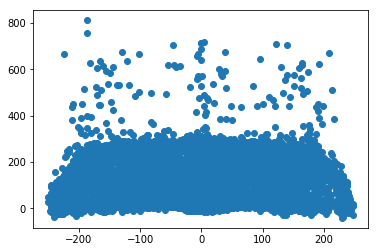

In [49]:
plt.scatter(x='loc_x', y='loc_y',data=df)

In [50]:
df.describe(include='number')

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,shot_distance,loc_x,loc_y,shot_made_flag,scoremargin_before_shot
count,1.395800e+04,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000,13958.000000
mean,2.442837e+07,270.438458,2.412380,4.727540,28.506376,17.600373,-0.554162,131.257988,0.472919,1.615561
std,7.226620e+06,169.927170,1.125828,3.331646,17.597701,10.295807,124.721869,102.666562,0.499284,10.127139
min,2.090002e+07,2.000000,1.000000,0.000000,0.000000,0.000000,-250.000000,-41.000000,0.000000,-39.000000
25%,2.120091e+07,109.000000,1.000000,2.000000,13.000000,8.000000,-96.000000,23.000000,0.000000,-4.000000
50%,2.150026e+07,275.500000,2.000000,4.000000,29.000000,22.000000,1.000000,141.000000,0.000000,1.000000
75%,2.170096e+07,398.000000,3.000000,7.000000,44.000000,25.000000,95.000000,219.000000,1.000000,8.000000
max,4.180040e+07,752.000000,6.000000,11.000000,59.000000,83.000000,247.000000,811.000000,1.000000,43.000000


In [51]:
df.describe(include='object')

,player_name,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,htm,vtm,season_type
count,13958,13958,13958,13958,13958,13958,13958,13958,13958
unique,1,53,2,7,6,5,32,32,2
top,Stephen Curry,Jump Shot,2PT Field Goal,Above the Break 3,Center(C),24+ ft.,GSW,GSW,Regular Season
freq,13958,6657,7135,5695,5987,6721,6871,7087,11846


In [52]:
df.vtm.unique()

array(['HOU', 'GSW', 'MEM', 'LAC', 'MIN', 'POR', 'LAL', 'IND', 'ORL',
       'SAS', 'WAS', 'PHX', 'BOS', 'SAC', 'CLE', 'MIA', 'MIL', 'CHI',
       'DEN', 'NJN', 'NOH', 'CHA', 'OKC', 'DAL', 'UTA', 'ATL', 'PHI',
       'DET', 'TOR', 'NYK', 'BKN', 'NOP'], dtype=object)

In [53]:
#del df['player_name']

## Part 1 
### Train / Validate / Test Split

In [58]:
train_dates = (df.index > '2009-10-01') & (df.index <= '2017-07-01')
val_dates = (df.index > '2017-10-01') & (df.index <= '2018-07-01')
test_dates = (df.index > '2018-10-01') & (df.index <= '2019-07-01')

,game_id,game_event_id,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot
game_date,,,,,,,,,,,,,,,,,,
2018-10-16,21800002,10,1,11,31,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,226,90,1,GSW,OKC,Regular Season,0.0
2018-10-16,21800002,58,1,7,57,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-2,63,1,GSW,OKC,Regular Season,4.0
2018-10-16,21800002,131,1,3,46,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,5,29,1,GSW,OKC,Regular Season,4.0
2018-10-16,21800002,141,1,2,58,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-6,18,0,GSW,OKC,Regular Season,7.0
2018-10-16,21800002,145,1,2,49,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,22,-228,8,1,GSW,OKC,Regular Season,7.0
2018-10-16,21800002,276,2,6,39,Driving Floating Bank Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,9,96,25,0,GSW,OKC,Regular Season,5.0
2018-10-16,21800002,293,2,6,5,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,28,-204,195,1,GSW,OKC,Regular Season,6.0
2018-10-16,21800002,368,2,1,3,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,6,25,1,GSW,OKC,Regular Season,6.0
2018-10-16,21800002,374,2,0,44,Driving Floating Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,12,113,52,0,GSW,OKC,Regular Season,8.0


In [81]:
target = 'shot_made_flag' 

X_train = df.loc[train_dates].drop(columns=[target])
X_val = df.loc[val_dates].drop(columns=[target])
X_test = df.loc[test_dates].drop(columns=[target])
y_train = df.loc[train_dates]['shot_made_flag']
y_val = df.loc[val_dates]['shot_made_flag']
y_test = df.loc[test_dates]['shot_made_flag']

In [83]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11081, 17), (1168, 17), (1709, 17), (11081,), (1168,), (1709,))

### Baselines

In [84]:
y_val.value_counts(normalize=True)

0    0.516267
1    0.483733
Name: shot_made_flag, dtype: float64

In [85]:
majority_class = y_val.mode()[0]
y_pred = [majority_class] * len(y_val)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.5162671232876712

### One-Hot encoding, fit random forest on Train using make_pipeline

In [87]:
%%time
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

CPU times: user 4.38 s, sys: 325 ms, total: 4.7 s
Wall time: 1.94 s


### Part 1 stretch goals

In [144]:
# Homecourt Advantage: Is the home team (htm) the Golden State Warriors (GSW) ?
# Opponent: Who is the other team playing the Golden State Warriors?
# Seconds remaining in the period: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
# Seconds remaining in the game: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
# Made previous shot: Was Steph Curry's previous shot successful?

#Homecourt
df['homecourt_adv'] = [1 if x == 'GSW' else 0 for x in df['htm']]


## Part 2 
### Validation accuracy

In [113]:
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.5787671232876712


### Test Accuracy

In [155]:
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.6155646576945583


### Random Forest Feature Importances

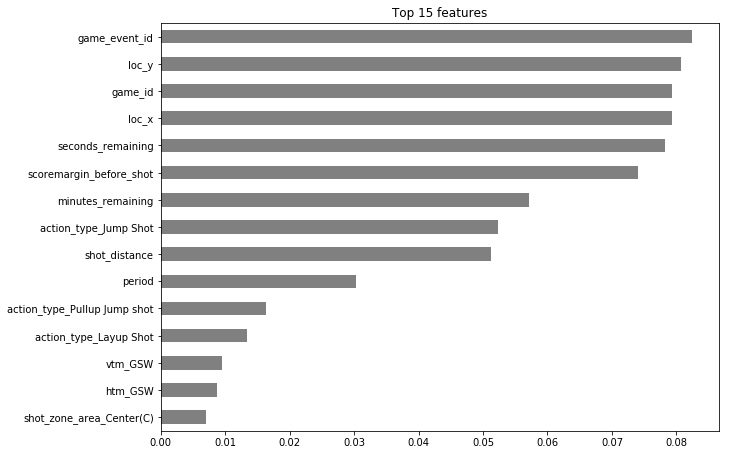

In [93]:
# Get feature importances
encoder = pipeline.named_steps['onehotencoder']
rf = pipeline.named_steps['randomforestclassifier']
feature_names = encoder.transform(X_train).columns
importances = pd.Series(rf.feature_importances_, feature_names)

# Plot feature importances
n = 15
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

### Calculate accuracy, precision, and recall for the given confusion matrix

In [146]:
# acc = true pos + true neg / total
# precision = true pos / true pos + fals pos
# recall = true pos / true pos + fals neg
# f1 = 2 * (pre*recall/pre+recall)

accuracy = (36 + 85) / 187
precision = 36 / (36 + 58)
recall = 36 / (36 + 8)
f1 = 2 * ((precision*recall)/(precision+recall))
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')

Accuracy: 0.6470588235294118
Precision: 0.3829787234042553
Recall: 0.8181818181818182


### Part 2 Stretch Goals 

#### F1 

In [147]:
print(f'F1: {f1}')

F1: 0.5217391304347826


#### Confusion Matrix (on test, make sure you run that test accuracy cell prior to this cell) 

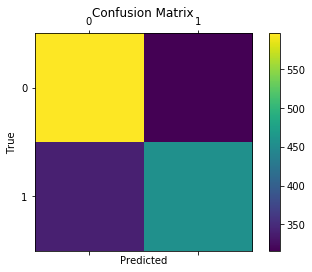

In [184]:
from sklearn.metrics import confusion_matrix

labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Classification Report

In [110]:
from sklearn.metrics import classification_report
target_names = ['Missed Shot','Made Shot']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Missed Shot       0.58      0.65      0.61       603
   Made Shot       0.57      0.51      0.54       565

   micro avg       0.58      0.58      0.58      1168
   macro avg       0.58      0.58      0.58      1168
weighted avg       0.58      0.58      0.58      1168

